**Capstone Project**






In [100]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [101]:
# Load data
df = pd.read_csv('UsArrests.csv',index_col='City')


df.head()

,Murder,Assault,UrbanPop,Rape
City,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [103]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


At first glance, the Assault variable stands out as having a mean and standard deviation which is dramatically higher than the other variables.  This indicates that scaling the data will be useful to keep the Assault from impacting the analysis disproportionately.

**Inspect data**

In [104]:
X = df[['Murder','Assault',	'UrbanPop','Rape']]


In [105]:
X.shape

(50, 4)

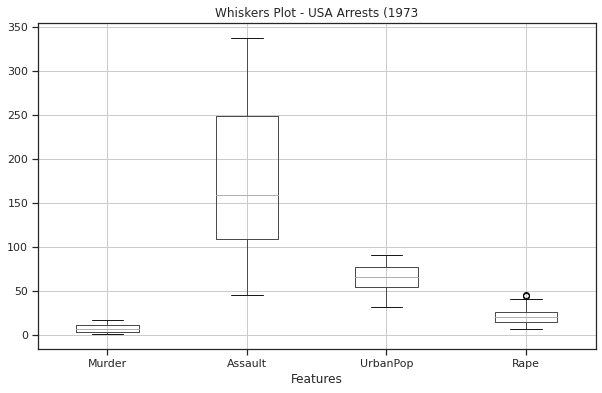

In [106]:
plt.figure(figsize=(10,6), facecolor='white')
plt.title("Whiskers Plot - USA Arrests (1973")
plt.xlabel("Features")
df.boxplot(figsize=(10,6))

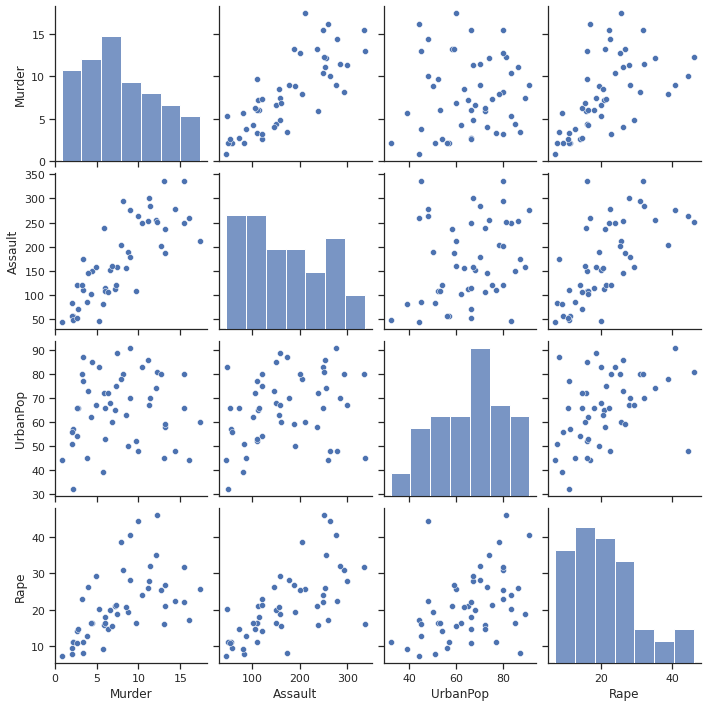

In [107]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
scatter = sns.pairplot(data=df, markers='o')

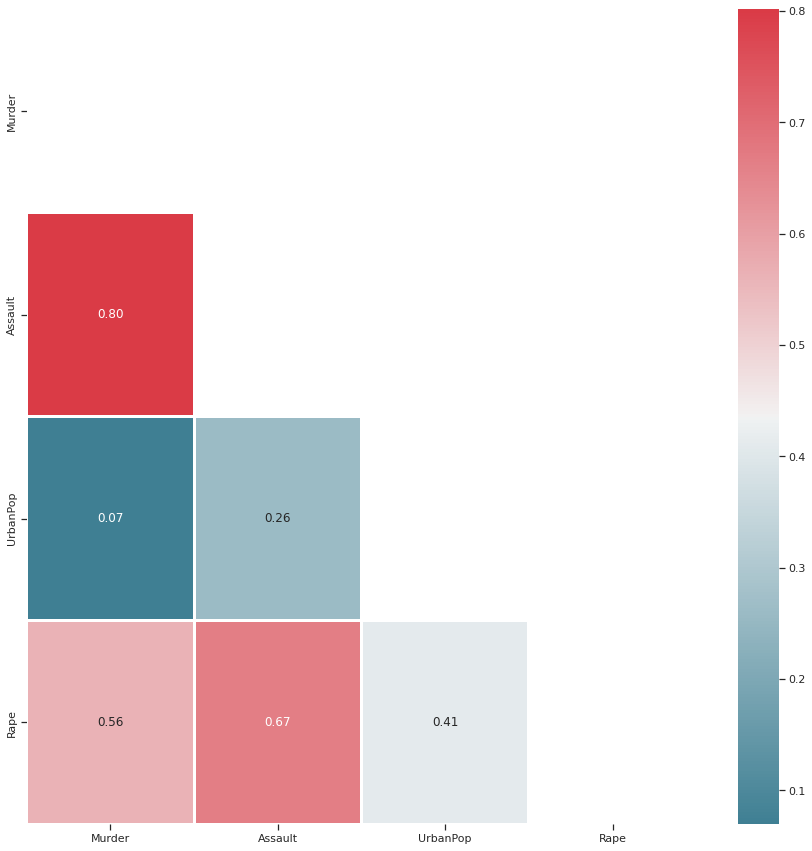

In [108]:
colormap = sns.diverging_palette(220, 10, as_cmap=True)

def corr_heatmap(df):
  # drop Species column
  #df = df.drop(columns=['Species'])
  # get correlations
  corrs = df.corr()
  
  # pick appropriate palette for heatmap

  # Plot figsize
  fig, ax = plt.subplots(figsize=(15, 15))

  # to mask mirrored side of heatmap
  dropSelf = np.zeros_like(corrs)
  dropSelf[np.triu_indices_from(dropSelf)] = True
  
  # Generate Heat Map, with annotations of the correlation strength and 2-decimal floats
  ax = sns.heatmap(corrs, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf, linewidth=2)

  plt.show()

corr_heatmap(df)

In the above plot, there is a linear correlation between strongly correlated variables: those coloured in either dark red or dark blue. Variables which are positively correlated are red: an increase in one corresponds to an increase in the other, while negatively correlated variables are blue: a decrease in one means an increase in the other.

**Apply PCA**

In [109]:
# select and standardize features
X = StandardScaler().fit_transform(X)


First find what is the optimal number of components

In [110]:
pca_test = PCA(n_components = 4)
pca_test.fit(X)

PCA(n_components=4)

In [111]:
explained_variance = pca_test.explained_variance_ratio_
explained_variance

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

In [112]:
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))

Text(0, 0.5, 'Cumulative variance')

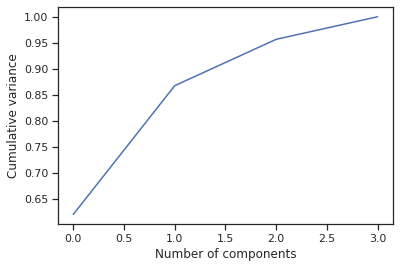

In [113]:
# Cumulative variance plot
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative variance')

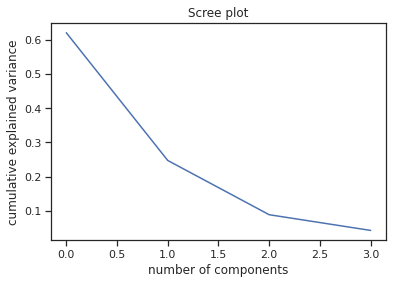

In [114]:
# Scree plot
plt.plot(pca_test.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("Scree plot")
plt.show()

From the above graph, when number of components = 2 it contains around 90% of the total information. Let us take principal components 2 

In [115]:
# define number of principal components as 2
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [116]:
# obtain components
principal_components = pca.transform(X)
principal_components

array([[ 0.98556588,  1.13339238],
       [ 1.95013775,  1.07321326],
       [ 1.76316354, -0.74595678],
       [-0.14142029,  1.11979678],
       [ 2.52398013, -1.54293399],
       [ 1.51456286, -0.98755509],
       [-1.35864746, -1.08892789],
       [ 0.04770931, -0.32535892],
       [ 3.01304227,  0.03922851],
       [ 1.63928304,  1.2789424 ],
       [-0.91265715, -1.57046001],
       [-1.63979985,  0.21097292],
       [ 1.37891072, -0.68184119],
       [-0.50546136, -0.15156254],
       [-2.25364607, -0.10405407],
       [-0.79688112, -0.2701647 ],
       [-0.75085907,  0.95844029],
       [ 1.56481798,  0.87105466],
       [-2.39682949,  0.37639158],
       [ 1.76336939,  0.42765519],
       [-0.48616629, -1.4744965 ],
       [ 2.10844115, -0.15539682],
       [-1.69268181, -0.63226125],
       [ 0.99649446,  2.39379599],
       [ 0.69678733, -0.26335479],
       [-1.18545191,  0.53687437],
       [-1.26563654, -0.19395373],
       [ 2.87439454, -0.7756002 ],
       [-2.38391541,

In [117]:
# add the City column as index to principal components
principal_components_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'], index = df.index)
principal_components_df

,PC1,PC2
City,,
Alabama,0.985566,1.133392
Alaska,1.950138,1.073213
Arizona,1.763164,-0.745957
Arkansas,-0.141420,1.119797
California,2.523980,-1.542934
Colorado,1.514563,-0.987555
Connecticut,-1.358647,-1.088928
Delaware,0.047709,-0.325359
Florida,3.013042,0.039229


The heatmap below shows that principal components are uncorrelated, showing that PCA has summarised all related information in a smaller number of variables.

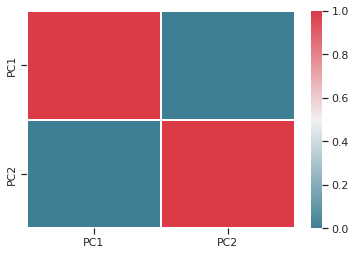

In [118]:
ax = sns.heatmap(principal_components_df.corr(), cmap=colormap,linewidth=1)
plt.show()

In [119]:
# transform the components into a pandas data frame

components = pca.components_.T
components_df = pd.DataFrame(components, columns=['PC1', 'PC2'], index=['Murder','Assault',	'UrbanPop','Rape'])
components_df


,PC1,PC2
Murder,0.535899,0.418181
Assault,0.583184,0.187986
UrbanPop,0.278191,-0.872806
Rape,0.543432,-0.167319


In [120]:
print('Explained variation per principal component: {}', format(pca.explained_variance_ratio_))

Explained variation per principal component: {} [0.62006039 0.24744129]


In [121]:
# to find the amount of data lost in data reduction
print('Amount of information lost due to PCA: ',(1-np.sum(pca.explained_variance_ratio_))*100, '%')

Amount of information lost due to PCA:  13.249831707766635 %


In [122]:
import plotly.express as px

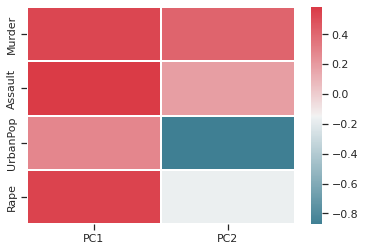

In [123]:
ax = sns.heatmap(components_df,cmap=colormap,linewidth=1)

**Hierarchial Clustering**

In [124]:
# import libraries
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(principal_components_df)

<Figure size 3600x720 with 0 Axes>

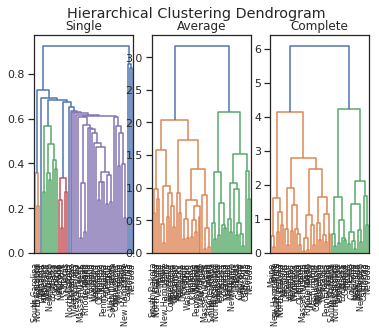

In [125]:
# create 3 Dendrograms using single,multiple and average methods
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(principal_components_df)
plt.figure(figsize=[50,10])
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Hierarchical Clustering Dendrogram')
ax1.set_title("Single")
dendrogram(linkage(principal_components_df, method='single'), labels=principal_components_df.index, ax=ax1) #change method: eg. single, average, complete...
ax2.set_title("Average")
dendrogram(linkage(principal_components_df, method='average'), labels=principal_components_df.index, ax=ax2)
ax3.set_title("Complete")
dendrogram(linkage(principal_components_df, method='complete'), labels=principal_components_df.index, ax=ax3)
plt.show()

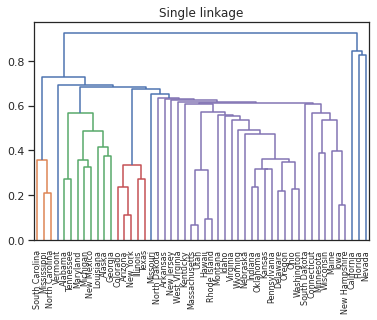

In [126]:
# Dendrogram using single linkage
plt.title("Single linkage")
dendrogram(linkage(principal_components_df, method='single'), labels=principal_components_df.index)
plt.show()

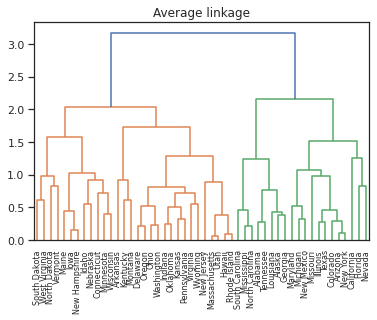

In [127]:
# Dendrogram using Average linkage
plt.title("Average linkage")
dendrogram(linkage(principal_components_df, method='average'), labels=principal_components_df.index)
plt.show()

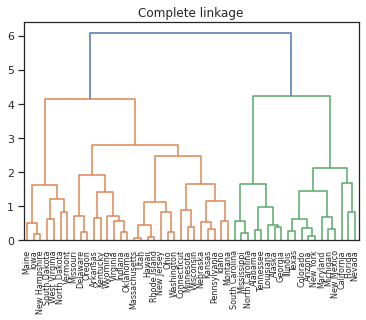

In [128]:
# Dendrogram using Complete linkage
plt.title("Complete linkage")
dendrogram(linkage(principal_components_df, method='complete'), labels=principal_components_df.index)
plt.show()

From the Dendrograms above, the complete linkage method creates the most balanced dispersion of clusters

with k = 2, the clusters are formed by grouping the cities having similar proportion of crime

**K-means clustering**

K-means is a very popular clustering partitioning algorithm that is fast and efficient and scales well for large datasets. It is an iterative process, so observations can switch between clusters while the algorithm runs until it converges at a local optimum. 



This method is not robust when it comes to noise data and outliers and is not suitable for clusters with non-convex shapes. Another drawback with K-means is the necessity of specifying K in advance.

For our analysis, to set the value for K we will be using Elbow method

 


Text(0.5, 1.0, 'Us Aressts Data')

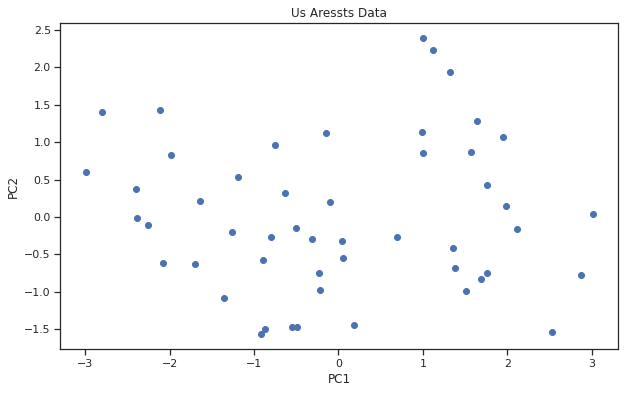

In [129]:
#Plot data points
plt.figure(figsize=(10,6))
plt.scatter(principal_components_df['PC1'],principal_components_df['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Us Aressts Data')

In [130]:
from sklearn.cluster import KMeans

In [131]:
#Fit the model and predict

kmeans= KMeans(n_clusters = 2, random_state = 42)


kmeans.fit(principal_components_df)


pred = kmeans.predict(principal_components_df)

pred

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

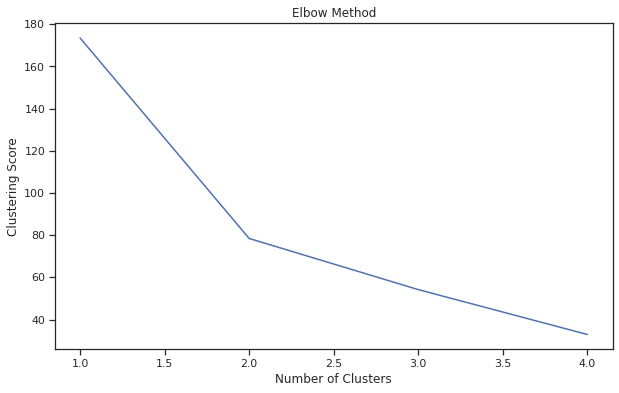

In [132]:
# use Elbow method

individual_clustering_score = []
for i in range(1, 5):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(principal_components_df)
    individual_clustering_score.append(kmeans.inertia_) 
    

plt.figure(figsize=(10,6))
plt.plot(range(1, 5), individual_clustering_score)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Clustering Score')
plt.show()

From the above plot for clustering score, there is a very steep decrease and from to the steepness reduces. Hence we get optimal value at K = 2

In [133]:
# to check individual clustering score
individual_clustering_score

[173.50033658446682, 78.4623228750309, 54.22908319574148, 32.95864311884387]

In [134]:
principal_components_df['Cluster'] = pred #Adding cluster column to main data

In [135]:
# to see cluster groups 
principal_components_df.head()

,PC1,PC2,Cluster
City,,,
Alabama,0.985566,1.133392,1
Alaska,1.950138,1.073213,1
Arizona,1.763164,-0.745957,1
Arkansas,-0.141420,1.119797,0
California,2.523980,-1.542934,1


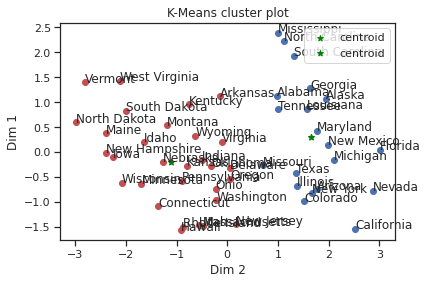

In [136]:
from sklearn.cluster import KMeans

# We extract the first two components
x = principal_components[:,0]
y = principal_components[:,1]

# Fit k-means
k=2
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(principal_components_df)
cent = kmeans.cluster_centers_

# Plot clusters
fig, ax = plt.subplots()
colours = 'rbgy'
for i in range(0,k):
    ax.scatter(x[cluster_labels == i],y[cluster_labels == i],c = colours[i]) 
    plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='green',marker='*',label='centroid')
for i in range(0,len(x)):
        txt = df.index[i]
        ax.annotate(txt, (x[i], y[i]))
ax.set_title("K-Means cluster plot")
ax.set_xlabel("Dim 2")
ax.set_ylabel("Dim 1")
ax.legend()

In [137]:
clusters = pd.DataFrame()

group0_indices = np.argwhere(cluster_labels==0).transpose()[0]
group1_indices = np.argwhere(cluster_labels==1).transpose()[0]

group0 = np.array(df.index)[group0_indices]
group1 = np.array(df.index)[group1_indices]
print("Group 0: ",group0)
print("Group 1: ",group1)

Group 0:  ['Arkansas' 'Connecticut' 'Delaware' 'Hawaii' 'Idaho' 'Indiana' 'Iowa'
 'Kansas' 'Kentucky' 'Maine' 'Massachusetts' 'Minnesota' 'Montana'
 'Nebraska' 'New Hampshire' 'New Jersey' 'North Dakota' 'Ohio' 'Oklahoma'
 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Dakota' 'Utah' 'Vermont'
 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']
Group 1:  ['Alabama' 'Alaska' 'Arizona' 'California' 'Colorado' 'Florida' 'Georgia'
 'Illinois' 'Louisiana' 'Maryland' 'Michigan' 'Mississippi' 'Missouri'
 'Nevada' 'New Mexico' 'New York' 'North Carolina' 'South Carolina'
 'Tennessee' 'Texas']


From above lists we can see clearly the names of cities that are grouped in cluster 0 and cluster 1 based on the similarities in the data

**Evaluate the model**

In [138]:
# import libraries
from sklearn.metrics import confusion_matrix, classification_report

In [139]:
# print confusion matrix and classification report to check the efficiency of our model

print(confusion_matrix(principal_components_df['Cluster'],cluster_labels))
print('\n')
print(classification_report(principal_components_df['Cluster'],cluster_labels))

[[30  0]
 [ 0 20]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        20

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



**CONCLUSION**

From the above reports, our model has 100% precision, that means the model has been fit perfectly